# Chapter 2 Image classifications by convolutional neural networks


In [6]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms as T
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from pathlib import Path

## 2.1 Classification of hand written digits in the MNIST database


### Project 2.1 MNIST Image Classification


In [7]:
class_names = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]
n_epochs = 25
batch_size = 32
Ir = 1e-2  # initial learning rate
img_size = 28
n_class = 10
n_hidden = 100
data_path = str(Path.home() / "data")


In [8]:
# Cell 02: MNIST train_dataset and test_dataset -------------------------------
train_dataset = MNIST(
  data_path,
  train=True,
  download=True,  # ------- line 01
  transform=T.Compose([T.ToTensor()]),
)
n_samples = len(train_dataset)  # n_samples = 60000
test_dataset = MNIST(
  data_path,
  train=False,
  download=True,  # ------- line 04
  transform=T.Compose([T.ToTensor()]),
)
n_tests = len(test_dataset)  # n_tests = 100000

In [9]:
# Cell 03: Dataloaders------------------------------------------------- Cell 03
train_dataloader = DataLoader(
  train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True
)
test_dataloader = DataLoader(
  test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True
)
for imgs, labels in train_dataloader:
  print("labels=", "\n", labels)
  print("batch_imgs.shape=", imgs.shape)  # torch.Size([32, 1, 28, 28])
  break

labels= 
 tensor([1, 6, 9, 0, 2, 5, 8, 7, 3, 5, 6, 1, 9, 5, 3, 3, 0, 1, 9, 2, 4, 7, 9, 1,
        1, 3, 2, 0, 0, 8, 7, 9])
batch_imgs.shape= torch.Size([32, 1, 28, 28])


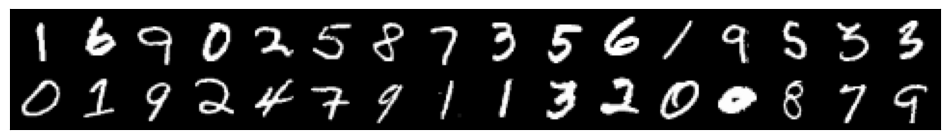

In [10]:
# Cell 04: Show images in the first dataloader------------------------- Cell 04
def show_images(my_imgs):
  fig, ax = plt.subplots(figsize=(12, 8))
  input = make_grid(my_imgs, nrow=16, padding=2)  # --------- line 03
  ax.imshow(input.permute(1, 2, 0), cmap="gray")
  ax.set(xticks=[], yticks=[])
  plt.show()


show_images(imgs)